In [74]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import control as ct

In [87]:
fs = 50
g = 9.81

data = [np.genfromtxt(entry.path, delimiter='\t') 
        for entry in os.scandir("measurements/10hz") 
        if entry.is_file()]
data = np.stack(data, axis=0)
averaged = np.mean(data, axis=0)
averaged = np.delete(averaged, 0, 1)*g

In [79]:
data[0,:,1:].shape

(12001, 3)

In [80]:
averaged.shape

(12001, 3)

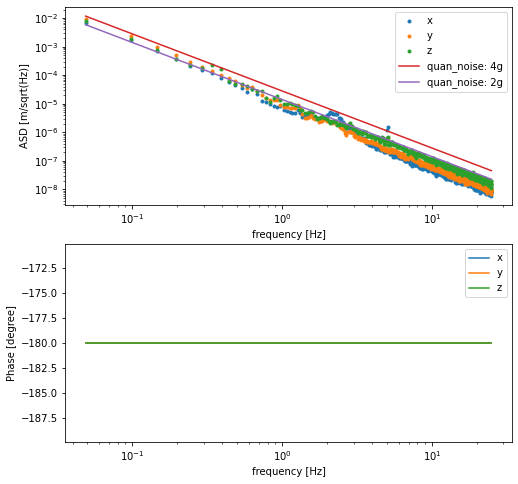

In [88]:
f, Pxx_den = signal.welch(averaged, fs, nperseg=1024, axis=0)
Axx_den = np.sqrt(Pxx_den)
omega = 2*np.pi*f[1:]
mag, phase, *_ = ct.tf(1, [1, 0, 0]).frequency_response(omega)

quan_noise_2g = (4/2**12*g)**2/6/fs
quan_noise_4g = (8/2**12*g)**2/6/fs

f_xy, cohXY = signal.coherence(averaged[:,0], averaged[:,1], fs=fs, nperseg=256)


fig, (ax1, ax2) = plt.subplots(figsize=(8,8), nrows=2)

labels = ['x', 'y', 'z']
for i, label in enumerate(labels):
    ax1.loglog(f[1:], Axx_den[1:, i]*mag, '.',label=label)
ax1.loglog(f[1:], np.sqrt(quan_noise_4g)*mag, label='quan_noise: 4g')
ax1.loglog(f[1:], np.sqrt(quan_noise_2g)*mag, label='quan_noise: 2g')
ax1.set_ylabel('ASD [m/sqrt(Hz)]')
ax1.set_xlabel('frequency [Hz]')
ax1.legend()

for i, label in enumerate(labels):
    ax2.semilogx(f[1:], phase/np.pi*180, label=label)
ax2.set_ylabel('Phase [degree]')
ax2.set_xlabel('frequency [Hz]')
ax2.legend()
plt.show()

In [86]:
f

array([0.        , 0.00976562, 0.01953125, 0.02929688, 0.0390625 ,
       0.04882812, 0.05859375, 0.06835938, 0.078125  , 0.08789062,
       0.09765625, 0.10742188, 0.1171875 , 0.12695312, 0.13671875,
       0.14648438, 0.15625   , 0.16601562, 0.17578125, 0.18554688,
       0.1953125 , 0.20507812, 0.21484375, 0.22460938, 0.234375  ,
       0.24414062, 0.25390625, 0.26367188, 0.2734375 , 0.28320312,
       0.29296875, 0.30273438, 0.3125    , 0.32226562, 0.33203125,
       0.34179688, 0.3515625 , 0.36132812, 0.37109375, 0.38085938,
       0.390625  , 0.40039062, 0.41015625, 0.41992188, 0.4296875 ,
       0.43945312, 0.44921875, 0.45898438, 0.46875   , 0.47851562,
       0.48828125, 0.49804688, 0.5078125 , 0.51757812, 0.52734375,
       0.53710938, 0.546875  , 0.55664062, 0.56640625, 0.57617188,
       0.5859375 , 0.59570312, 0.60546875, 0.61523438, 0.625     ,
       0.63476562, 0.64453125, 0.65429688, 0.6640625 , 0.67382812,
       0.68359375, 0.69335938, 0.703125  , 0.71289062, 0.72265

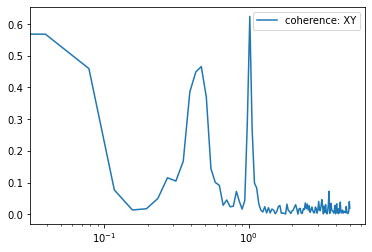

In [73]:
plt.semilogx(f_xy, cohXY, label='coherence: XY')
plt.legend()